<a href="https://colab.research.google.com/github/Jvbcarv/Python_Ciencia_de_Dados_02/blob/main/Aula02_Python_e_Ciencia_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Somente para eu me lembrar: fizemos upload de 3 arquivos aqui no Colab, com extensão (.csv), antes de iniciar a aula.
#Esses arquivos são os dados que usaremos na aula de hoje.

## **Nota**

In [ ]:
import pandas as pd #colocamos como nome "pd" para simplificar a palavra pandas

notas = pd.read_csv("ratings.csv") #ratings.csv é o nome do arquivo de notas que fizemos upload
notas.head() #head = cabeçalho

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
notas.shape # shape =  mostra quantas linhas e quantas colunas possui

(100836, 4)

In [ ]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"] #renomeando o cabeçalho das colunas
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
notas.head(10) #definindo a quantidade de linhas que quero que apareça para mim, exemplo 10 linhas.

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [ ]:
notas['nota'].unique()  #unique = mostra todas as possibilidades de nota (tem mais de 100 notas)

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [ ]:
print("Média:", notas['nota'].mean()) #fazer uma média

Média: 3.501556983616962


In [ ]:
print("Mediana:", notas['nota'].median()) #achar a mediana

Mediana: 3.5


In [ ]:
notas.nota.head() #visualização de uma única coluna, por exemplo a coluna de nota

,nota
0,4.0
1,4.0
2,4.0
3,5.0
4,5.0


In [ ]:
notas['nota'].value_counts() #value_counts = mostra a frequência de cada nota

,count
nota,
4.0,26818
3.0,20047
5.0,13211
3.5,13136
4.5,8551
2.0,7551
2.5,5550
1.0,2811
1.5,1791


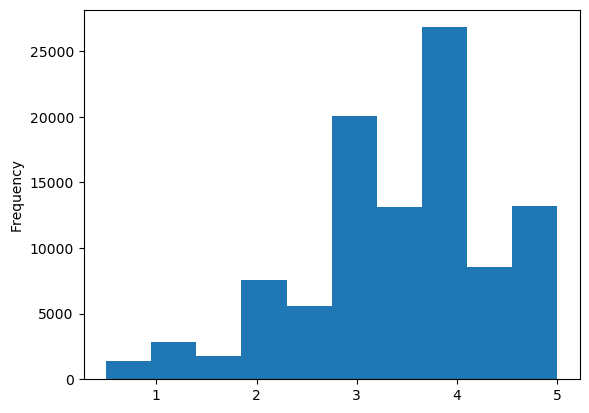

In [ ]:
notas.nota.plot(kind='hist') #mostrar a frequência em gráfico

In [ ]:
notas.nota.describe() #nos dá um resumo das colunas

,nota
count,100836.000000
mean,3.501557
std,1.042529
min,0.500000
25%,3.000000
50%,3.500000
75%,4.000000
max,5.000000


In [ ]:
#usaremos bibliotecas para plotar dados, exemplo matplotlib

!pip install seaborn==0.9.0 matplotlib==3.1.3

In [ ]:
import seaborn as sns #colocamos como nome "sns" para simplificar a palavra seaborn

In [ ]:
import numpy as np #colocamos como nome "np" para simplificar a palavra numpy, e colocamos a identificação de flutuantes, inteiros e booleanos

np.float = float
np.int = int
np.bool = bool

In [ ]:
print(sns.__version__) #visualização de qual a versão do seaborn

0.9.0


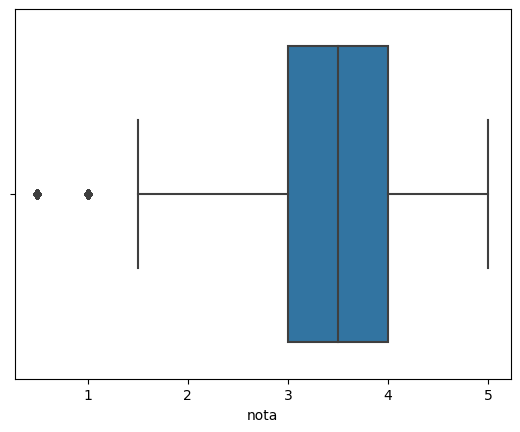

In [ ]:
sns.boxplot(notas.nota) #gráfico boxplot: mostra ponto mínimo e máximo, mediana, dados em % em cada quartil, dados que se diferem dos demais... (matéria de estatística e probabilidade)

## **Filmes**

In [ ]:
filmes = pd.read_csv("movies.csv")
filmes.head() #head = cabeçalho

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
#Exercício: nomear o cabeçalho das colunas com FilmeId", "Título", "Gênero":

filmes.columns = ["FilmeId", "Título", "Gênero"] #renomeando o cabeçalho das colunas
filmes.head()

,FilmeId,Título,Gênero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
notas.head() #revisando como ficou

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
filmes.head() #revisando como ficou

,FilmeId,Título,Gênero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## **Cruzando informações de notas e filmes **

In [ ]:
notas.query("filmeId==1").nota.mean() #fazendo uma média das notas através do filme com Id 1

np.float64(3.9209302325581397)

In [ ]:
media_por_filme = notas.groupby("filmeId").mean().nota
media_por_filme.head() #media de notas por filme

,nota
filmeId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


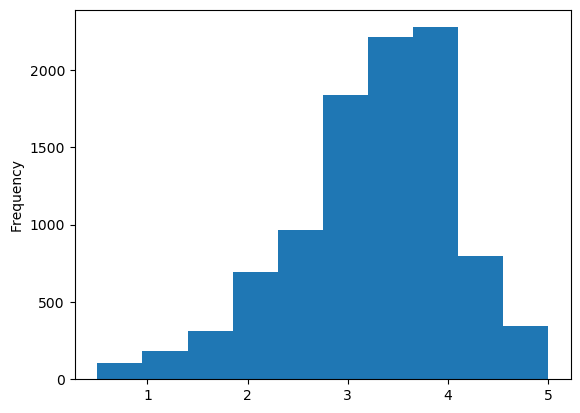

In [ ]:
media_por_filme.plot(kind="hist") #Histograma com media

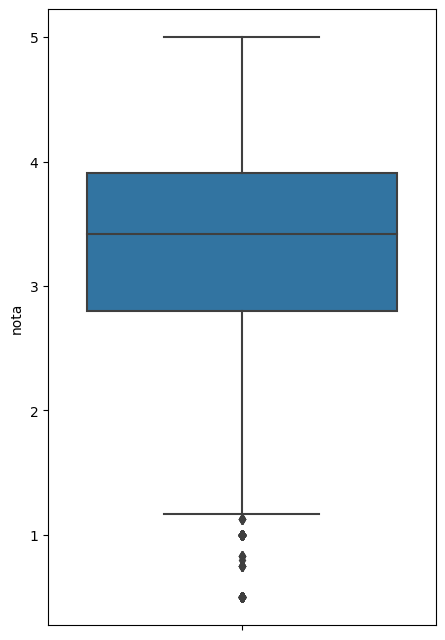

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8)) #boxplot com tamanho definido em 5 por 8
sns.boxplot(y=media_por_filme)

In [ ]:
media_por_filme.describe() #resumo da média por filme. Esses dados batem com o boxplot acima.

,nota
count,9724.000000
mean,3.262448
std,0.869874
min,0.500000
25%,2.800000
50%,3.416667
75%,3.911765
max,5.000000


Text(0.5, 1.0, 'Distribuicao')

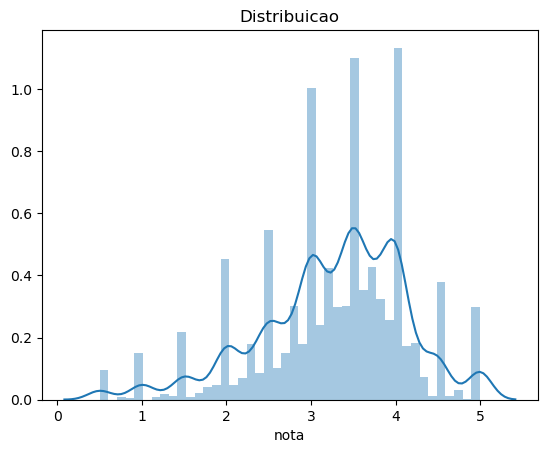

In [ ]:
sns.distplot(media_por_filme) #gráfico de distribuição da média por filme
plt.title("Distribuicao")

Text(0.5, 1.0, 'Histograma - Média dos Filmes')

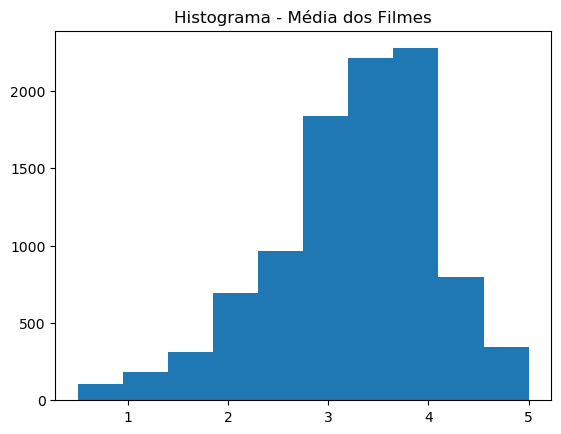

In [ ]:
plt.hist(media_por_filme) #Histograma com media
plt.title("Histograma - Média dos Filmes")

### **TMDB**

In [ ]:
tmdb = pd.read_csv("tmdb_5000_movies.csv") #tmdb_5000_movies.csv é o nome do arquivo de tmdb que fizemos upload
tmdb.head() #head = cabeçalho

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
#Exercício - Imprimir todas as possíveis linguagens do tmdb - sem repetir:

tmdb['original_language'].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [ ]:
tmdb["original_language"].value_counts().values #value_counts = conta os valores totais de cada linguagem

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [ ]:
#Mostrando os valores totais de cada linguagem em tabela:

contagem_de_lingua = tmdb["original_language"].value_counts().to_frame().reset_index() #transformando em dataframe
contagem_de_lingua.columns = ["original_language", "total"] #nomeação das colunas que quero
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


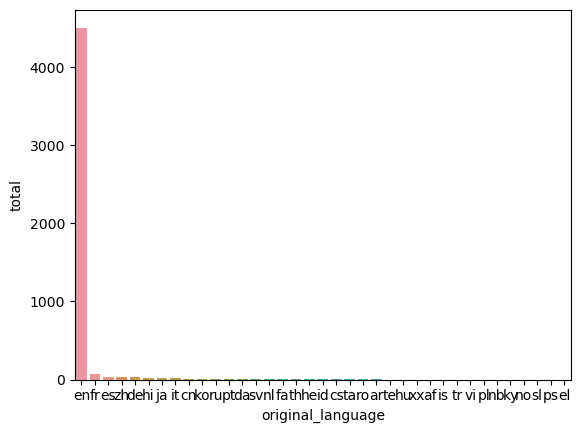

In [ ]:
#Mostrando os valores totais de cada linguagem em Gráfico de Barras:

sns.barplot(x="original_language", y="total", data=contagem_de_lingua)

([<matplotlib.patches.Wedge at 0x7aa439532b90>,
 [Text(-1.0791697944848757, 0.21305528548118974, 'en'),
  Text(1.0355355060813987, -0.371033981792425, 'fr'),
  Text(1.0579676532751783, -0.30117178590202043, 'es'),
  Text(1.0687996896821872, -0.2601292435218708, 'zh'),
  Text(1.0773192231958597, -0.22222351660584796, 'de'),
  Text(1.0835168605253713, -0.18971350230609152, 'hi'),
  Text(1.0875755883723952, -0.16486157701671572, 'ja'),
  Text(1.0906010458121063, -0.14348992603503677, 'it'),
  Text(1.092883468191142, -0.12492287602557497, 'cn'),
  Text(1.094639090663068, -0.10846778873163951, 'ko'),
  Text(1.0960865548595407, -0.0927052547385707, 'ru'),
  Text(1.097205502470541, -0.078358696699014, 'pt'),
  Text(1.0979654406138135, -0.06687220063460171, 'da'),
  Text(1.0984565068410161, -0.05825206072434674, 'sv'),
  Text(1.0987803772611597, -0.05178496447641595, 'nl'),
  Text(1.0990363134163792, -0.04603457170578121, 'fa'),
  Text(1.0992355467780295, -0.041002593815593756, 'th'),
  Text(1

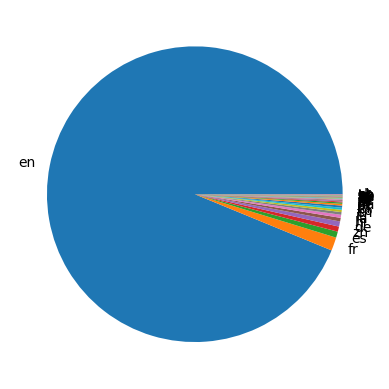

In [ ]:
plt.pie(contagem_de_lingua["total"], labels=contagem_de_lingua["original_language"]) #Gráfico de Pizza

In [ ]:
total_por_lingua = tmdb["original_language"].value_counts() #contagem de valores totais de cada linguagem
total_geral = total_por_lingua.sum() #soma de todos os valores totais de cada linguagem
total_de_ingles = total_por_lingua.loc["en"] #seleção somente do que está em inglês "en"
total_do_resto = total_geral - total_de_ingles #soma de todos os valores totais de cada linguagem menos o inglês
print(total_de_ingles, total_do_resto) #mostra os valores

4505 298


In [ ]:
#criação de dicionário, exemplo dicionário chamado dados
dados = {
    'lingua' : ['ingles', 'outros'], #criação de coluna 'lingua'
    'total' : [total_de_ingles, total_do_resto] #criação de coluna 'total'
}
dados = pd.DataFrame(dados) #transformando em dataframe
dados.head()

,lingua,total
0,ingles,4505
1,outros,298


Text(0.5, 1.0, 'Total de filmes por língua: Total de inglês e total de outros.')

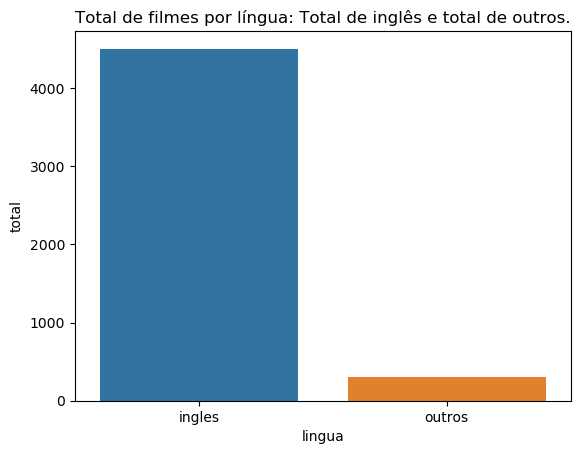

In [ ]:
#Exercício - plotar gráfico de barras demonstrando total de inglês e total de outros.
#OBS: Inserir título no gráfico.

sns.barplot(x="lingua", y="total", data=dados)
plt.title("Total de filmes por língua: Total de inglês e total de outros.")

Text(0.5, 1.0, 'Gráfico de pizza: Total de inglês e total de outros.')

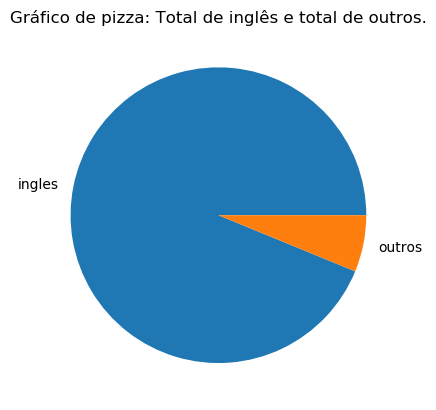

In [ ]:
#Exercício - plotar gráfico de pizza demonstrando total de inglês e total de outros.
#OBS: Inserir título no gráfico.

plt.pie(dados["total"], labels=dados["lingua"])
plt.title("Gráfico de pizza: Total de inglês e total de outros.")

In [ ]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts() #seleção somente do que não está em inglês "en"
total_por_lingua_de_outros_filmes #mostra o total por lingua, que não sejam em inglês

,count
original_language,
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12
ko,11


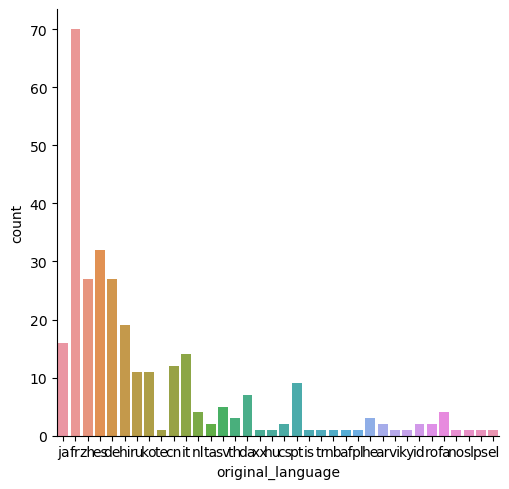

In [ ]:
filmes_sem_lingua_em_ingles = tmdb.query("original_language != 'en'") #seleção somente do que não está em inglês "en"
sns.catplot(x="original_language", kind="count", data=filmes_sem_lingua_em_ingles) #gráfico de barras com filmes sem língua inglesa

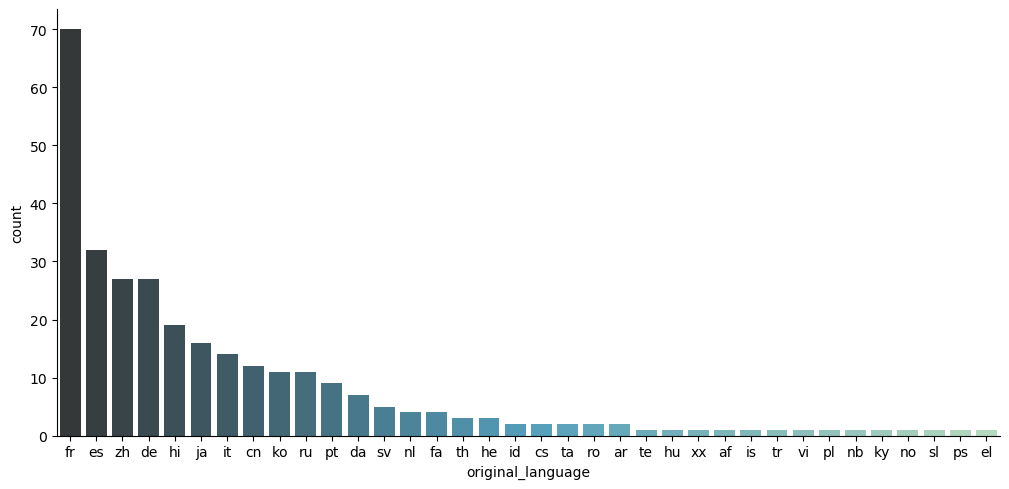

In [ ]:
sns.catplot(x="original_language", kind="count", aspect=2, #tamanho definido em 2
    order = total_por_lingua_de_outros_filmes.index, #definindo a ordem
    data=filmes_sem_lingua_em_ingles,
    palette="GnBu_d" #definindo a paleta de cores
)
#gráfico de barras com filmes sem língua inglesa, com tamanho definido em 2

